In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#for json convertion
import ast


import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.mixture import BayesianGaussianMixture


# Data Import

## Data Sets without outliers

In [2]:
features = pd.read_csv('features_all_no_outliers.csv')
site1 = pd.read_csv('featuresA_no_outliers.csv')
site2 = pd.read_csv('featuresB_no_outliers.csv')

In [3]:
#control if data was loaded
print('Original Data')
print(features.head())
print('')
print('Site 1')
print(site1.head())
print('')
print('Site 2')
print(site2.head())

Original Data
   session_duration  charging_duration  idle_duration  charging_efficiency  \
0        261.533333         241.816667      19.716667             2.985898   
1        350.583333         278.683333      71.900000             3.076395   
2        657.033333         136.950000     520.083333             2.828916   
3        469.866667         177.916667     291.950000             2.500946   
4        301.000000         183.950000     117.050000             3.232074   

   kWhDelivered  
0        12.034  
1        14.289  
2         6.457  
3         7.416  
4         9.909  

Site 1
   session_duration  charging_duration  idle_duration  charging_efficiency  \
0        261.533333         241.816667      19.716667             2.985898   
1        350.583333         278.683333      71.900000             3.076395   
2        657.033333         136.950000     520.083333             2.828916   
3        469.866667         177.916667     291.950000             2.500946   
4        30

In [4]:
# List of dataframes to loop through
dataframes = [features, featuresA, featuresB]
names = ['features', 'featuresA', 'featuresB']

# Create boxplots and scatter plots for each dataframe
for i, df in enumerate(dataframes):
    # Boxplot for 'charging_duration'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['charging_duration'])
    plt.title(f'Boxplot of charging_duration - {names[i]}')
    plt.xlabel('Charging Duration')
    plt.show()

    # Boxplot for 'kWhDelivered'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['kWhDelivered'])
    plt.title(f'Boxplot of kWhDelivered - {names[i]}')
    plt.xlabel('kWh Delivered')
    plt.show()

    # Scatter plot of 'charging_duration' vs 'kWhDelivered'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['charging_duration'], y=df['kWhDelivered'])
    plt.title(f'Scatter Plot of charging_duration vs kWhDelivered - {names[i]}')
    plt.xlabel('Charging Duration')
    plt.ylabel('kWh Delivered')
    plt.show()


NameError: name 'featuresA' is not defined

In [ ]:
# Define custom boundaries for each dataset
bounds = {
    "features": {
        "charging_duration": (0, 450),  # Min: 0 min, Max: 700 min
        "kWhDelivered": (0, 26)      # Min: 0 kWh, Max: 65 kWh
    },
    "featuresA": {
        "charging_duration": (0, 460), #540 
        "kWhDelivered": (0, 26) #29
    },
    "featuresB": {
        "charging_duration": (0, 300),  #350
        "kWhDelivered": (0, 23)
    }
}

# Function to remove outliers based on fixed boundaries
def apply_fixed_boundaries(df, dataset_name):
    return df[
        (df['charging_duration'] >= bounds[dataset_name]["charging_duration"][0]) & 
        (df['charging_duration'] <= bounds[dataset_name]["charging_duration"][1]) & 
        (df['kWhDelivered'] >= bounds[dataset_name]["kWhDelivered"][0]) & 
        (df['kWhDelivered'] <= bounds[dataset_name]["kWhDelivered"][1])
    ].copy()

# Apply boundary filtering
features_boundaries = apply_fixed_boundaries(features, "features")
featuresA_boundaries = apply_fixed_boundaries(featuresA, "featuresA")
featuresB_boundaries = apply_fixed_boundaries(featuresB, "featuresB")

Check if outliers are actually removed

In [ ]:
# List of dataframes to loop through
dataframes = [features_boundaries, featuresA_boundaries, featuresB_boundaries]
names = ['features', 'featuresA', 'featuresB']

# Create boxplots and scatter plots for each dataframe
for i, df in enumerate(dataframes):
    # Boxplot for 'charging_duration'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['charging_duration'])
    plt.title(f'Boxplot of charging_duration - {names[i]}')
    plt.xlabel('Charging Duration')
    plt.show()

    # Boxplot for 'kWhDelivered'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['kWhDelivered'])
    plt.title(f'Boxplot of kWhDelivered - {names[i]}')
    plt.xlabel('kWh Delivered')
    plt.show()

    # Scatter plot of 'charging_duration' vs 'kWhDelivered'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['charging_duration'], y=df['kWhDelivered'])
    plt.title(f'Scatter Plot of charging_duration vs kWhDelivered - {names[i]}')
    plt.xlabel('Charging Duration')
    plt.ylabel('kWh Delivered')
    plt.show()


In [ ]:
scaler = StandardScaler()

#original dataset
scaled_features = scaler.fit_transform(features_boundaries)

#parking site A
scaled_featuresA = scaler.fit_transform(featuresA_boundaries)

#parking site B
scaled_featuresB = scaler.fit_transform(featuresB_boundaries)

## Scaled data sets

In [5]:
features_scaled = pd.read_csv('scaled_features_all.csv')
site1_scaled = pd.read_csv('scaled_featuresA.csv')
site2_scaled = pd.read_csv('scaled_featuresB.csv')

In [6]:
#control if data was loaded
print('Original Data')
print(features_scaled.head())
print('')
print('Site 1')
print(site1_scaled.head())
print('')
print('Site 2')
print(site2_scaled.head())

Original Data
   session_duration  charging_duration  idle_duration  charging_efficiency  \
0         -0.631921           0.475627      -1.004437            -0.411346   
1         -0.164948           0.817298      -0.699390            -0.351114   
2          1.442062          -0.496251       1.920547            -0.515828   
3          0.460569          -0.116582       0.586952            -0.734112   
4         -0.424960          -0.060667      -0.435457            -0.247500   

   kWhDelivered  
0      0.223837  
1      0.586510  
2     -0.673117  
3     -0.518880  
4     -0.117929  

Site 1
   session_duration  charging_duration  idle_duration  charging_efficiency  \
0         -0.792565           0.180498      -1.018747            -0.373448   
1         -0.313719           0.508666      -0.701684            -0.311132   
2          1.334149          -0.752972       2.021456            -0.481547   
3          0.327701          -0.388307       0.635329            -0.707387   
4         -

# Cluster Analysis

## kMean

### without differentiating between the sites

In [7]:
print(features.shape)  # Check the number of rows in features
print(features_scaled.shape)  # Check the number of rows in features_scaled

(31214, 5)
(31214, 5)


In [8]:
# Remove rows with NaN or infinite values in any column
features_scaled_cleaned = features_scaled[~np.isinf(features_scaled).any(axis=1) & features_scaled.notna().all(axis=1)]

## Determine optimal number of clusters (Elbow Method) for the whole data set

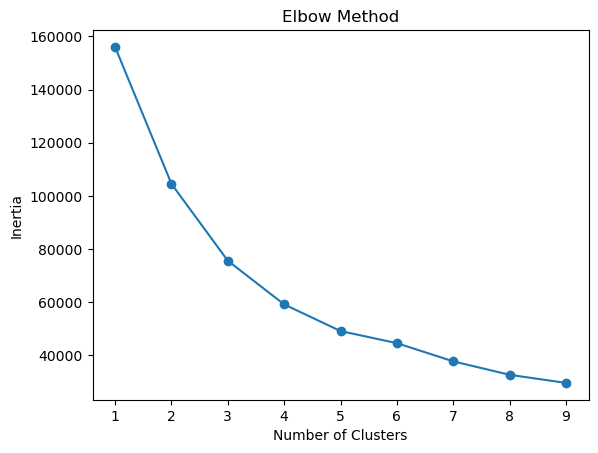

In [9]:
# Determine optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Determine optimal number of clusters (Hierarchical Method/ Agglomerative Clustering) for the whole data set

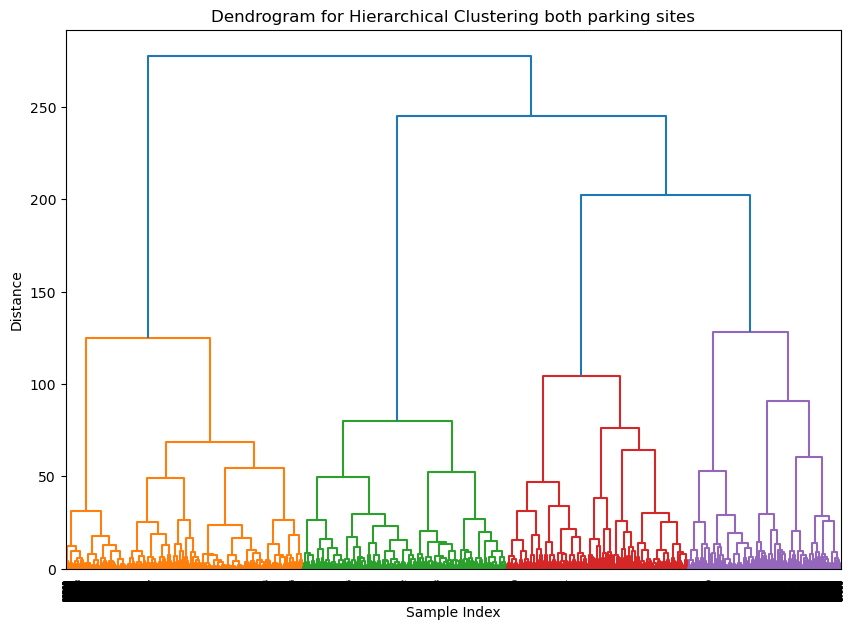

Cluster labels for each data point: [29 34 23 ... 11 51  6]


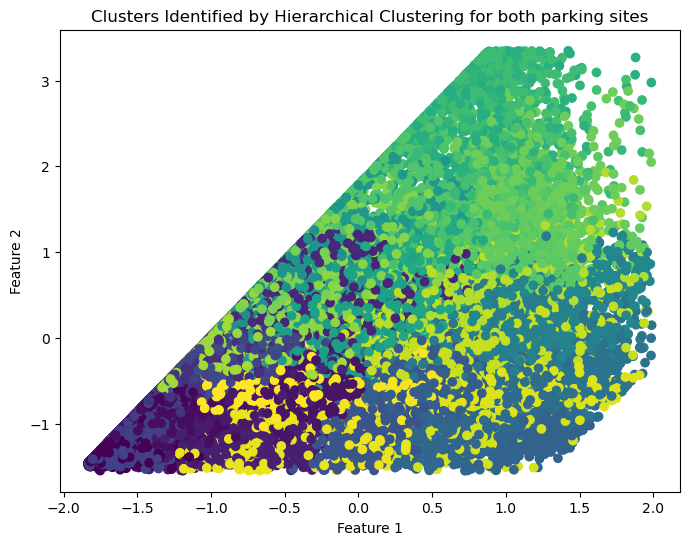

In [12]:
# Perform hierarchical/agglomerative clustering
Z = sch.linkage(features_scaled_cleaned, method='ward')  # 'ward' minimizes the variance of the clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering both parking sites")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


max_d = 15  # Adjust this value to cut the dendrogram at a certain height
clusters = fcluster(Z, max_d, criterion='distance')

# Print the clusters for each data point
print("Cluster labels for each data point:", clusters)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled_cleaned.iloc[:, 0], features_scaled_cleaned.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters Identified by Hierarchical Clustering for both parking sites")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### Interpretation of the plots

The elbow plot shows a bend at "number of clusters" = 3. The dendogram also displays 3 clusters, therefore the amount of clusters will be set to 3 in the next step.

## KMeans Application with optimal clusters on the whole dataset

In [13]:
# Apply KMeans with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
featuresNew = features.copy()
featuresNew['cluster'] = kmeans.fit_predict(features_scaled_cleaned)

In [14]:
cluster_summary = featuresNew.groupby('cluster').mean()
print(cluster_summary)

         session_duration  charging_duration  idle_duration  \
cluster                                                       
0              175.843402         123.516095      52.327307   
1              542.581677         157.571846     385.009830   
2              465.581472         321.230559     144.350913   

         charging_efficiency  kWhDelivered  
cluster                                     
0                   4.108460      8.273673  
1                   3.095855      7.720060  
2                   3.539879     17.405965  


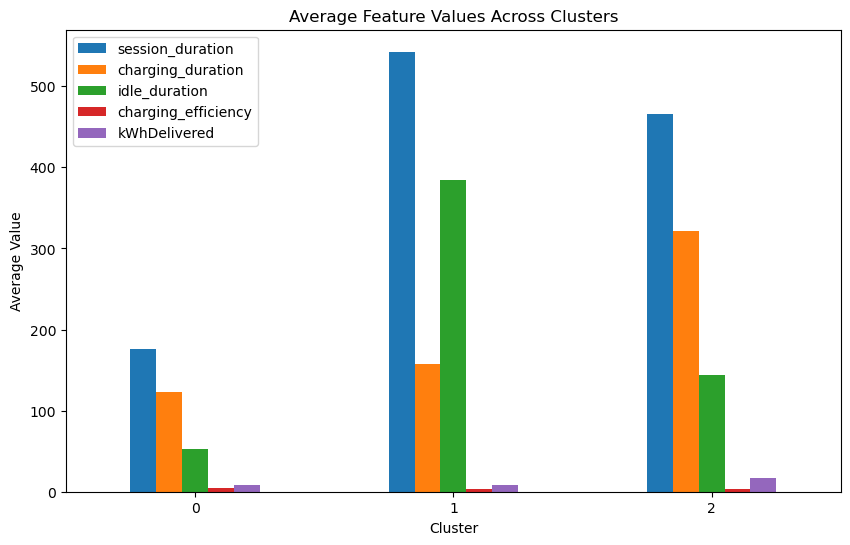

In [15]:
# Bar plot for comparing features across clusters
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values Across Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

## Visualization of the clusters

### Pairplot to see relations between features

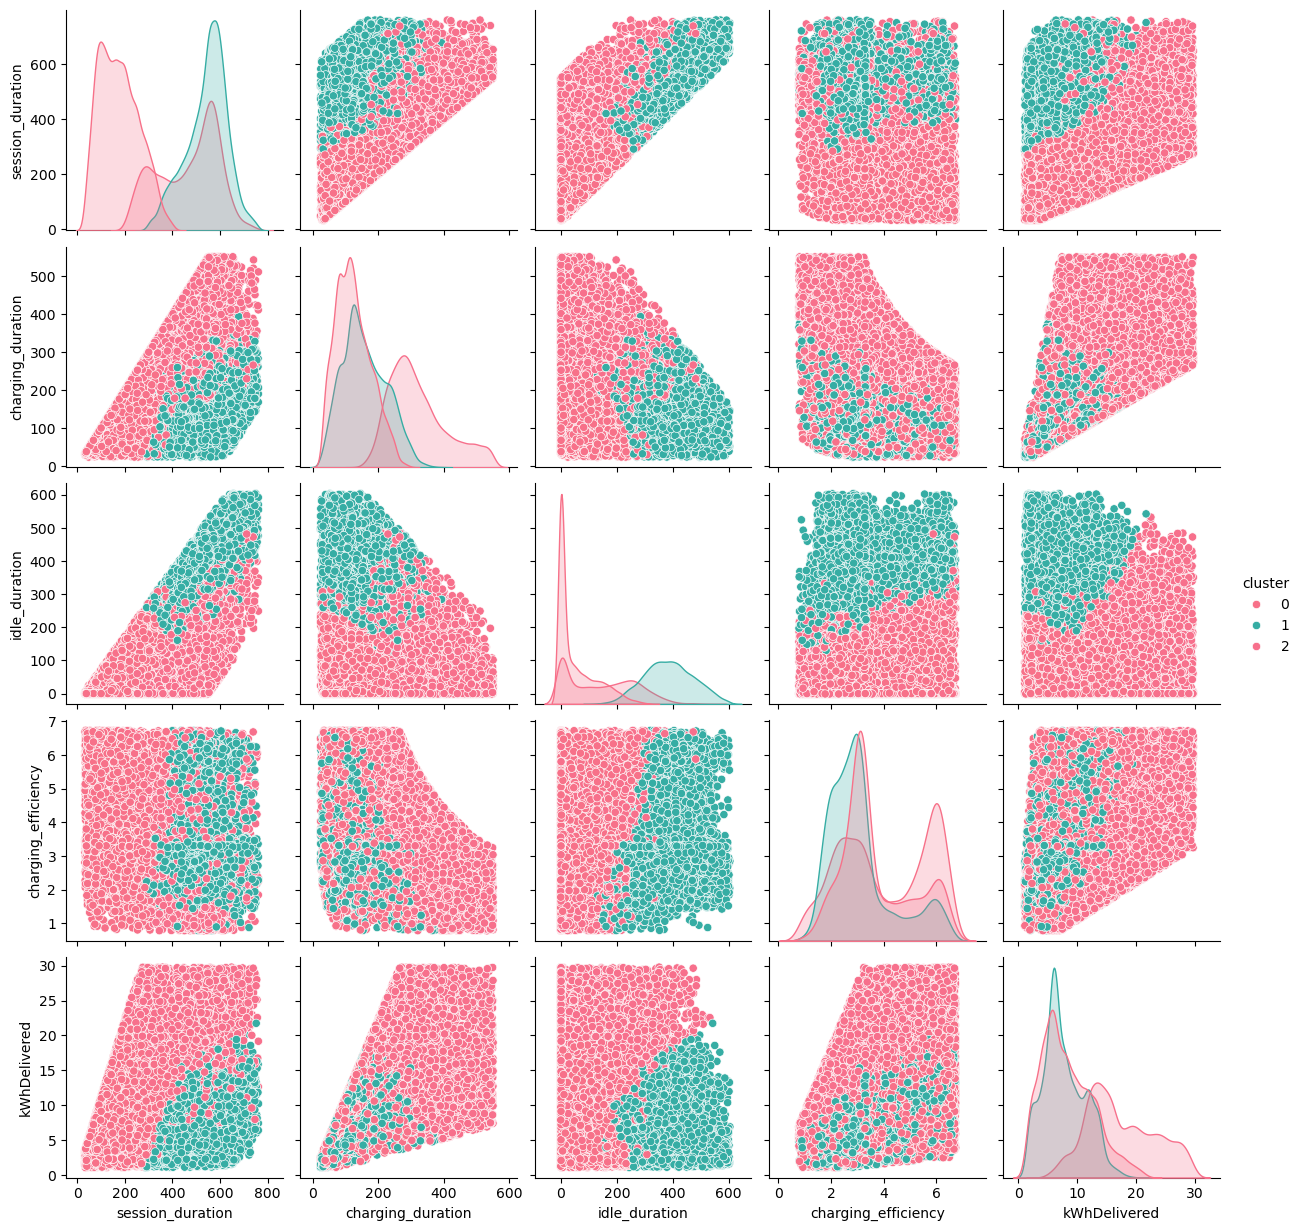

In [16]:
sns.pairplot(featuresNew, hue='cluster', palette='husl')
plt.show()

#### Scatterplots to see different feature-combinations

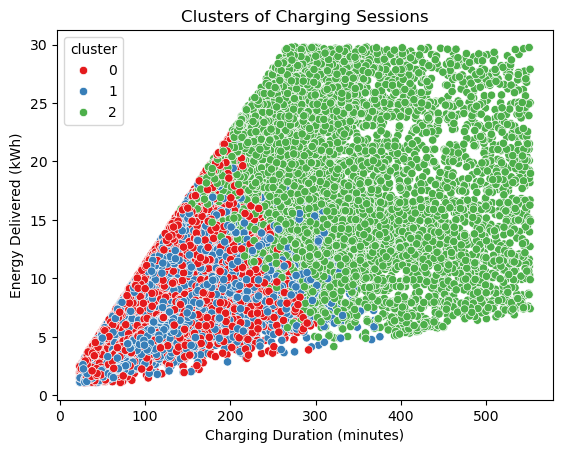

In [17]:
sns.scatterplot(data=featuresNew, x='charging_duration', y='kWhDelivered', hue='cluster', palette='Set1')
plt.title('Clusters of Charging Durations')
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Energy Delivered (kWh)')
plt.show()

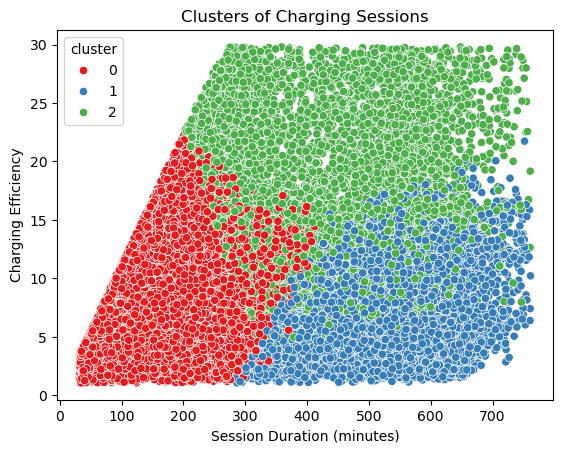

In [21]:
sns.scatterplot(data=featuresNew, x='session_duration', y='kWhDelivered', hue='cluster', palette='Set1')
plt.title('Clusters of Charging Sessions')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Energy Delivered (kWh)')
plt.show()

#### Interpretation: 
As seen in the scatter plots above, clusters are more defined in the session duration - kwHdelivered plot. This will also be from now on the feature combination to focus on, since it is more important for the forecast. The charging duration only shows, how long the charging itself was, but the car could have been connected to the charging station for a longer period of time. 

### box plots for session_duration and kWhDelivered

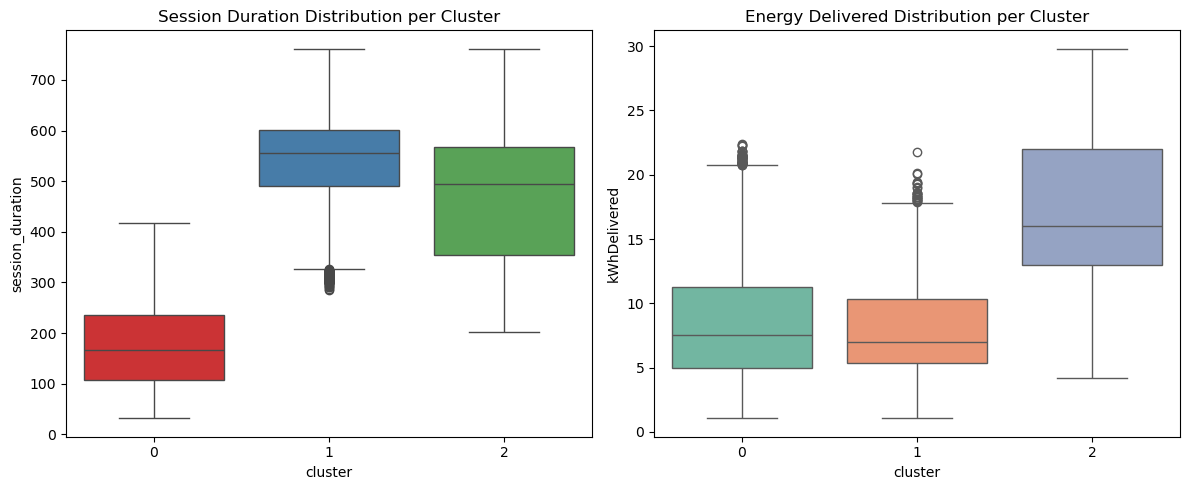

In [22]:
plt.figure(figsize=(12,5))

# Boxplot for Charging Session
plt.subplot(1,2,1)
sns.boxplot(x=featuresNew['cluster'], y=featuresNew['session_duration'], hue=featuresNew['cluster'], legend=False, palette="Set1")
plt.title("Session Duration Distribution per Cluster")

# Boxplot for Energy Delivered
plt.subplot(1,2,2)
sns.boxplot(x=featuresNew['cluster'], y=featuresNew['kWhDelivered'], hue=featuresNew['cluster'], legend=False, palette="Set2")
plt.title("Energy Delivered Distribution per Cluster")

plt.tight_layout()
plt.show()

### violin plots for session_duration and kWhDelivered

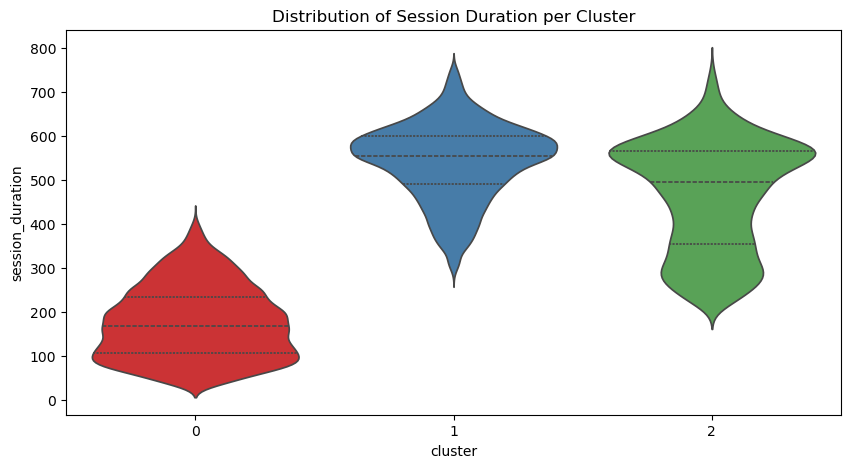

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x=featuresNew['cluster'], y=featuresNew['session_duration'], hue=featuresNew['cluster'], legend=False, palette="Set1", inner="quartile")
plt.title("Distribution of Session Duration per Cluster")
plt.show()

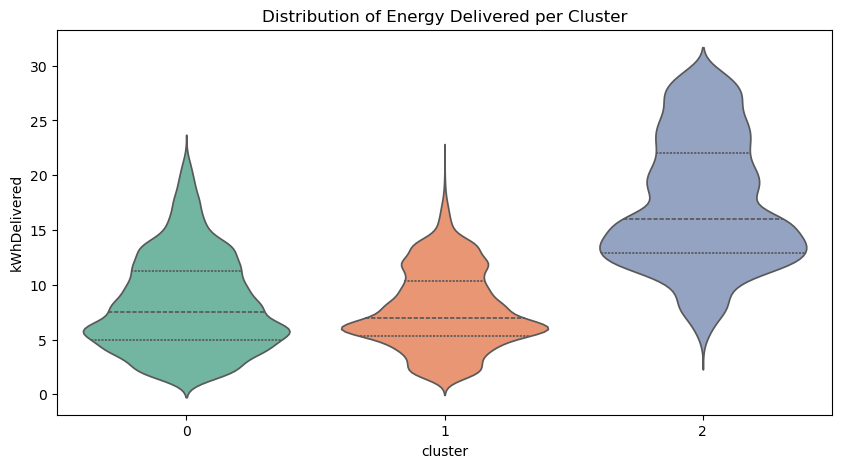

In [26]:
plt.figure(figsize=(10,5))
sns.violinplot(x=featuresNew['cluster'], y=featuresNew['kWhDelivered'], hue=featuresNew['cluster'], legend=False, palette="Set2", inner="quartile")
plt.title("Distribution of Energy Delivered per Cluster")
plt.show()

# For site 1

In [28]:
print(site1.shape)  # Check the number of rows in site1
print(site1_scaled.shape)  # Check the number of rows in site1_scaled

(21041, 5)
(21041, 5)


In [29]:
# Remove rows with NaN or infinite values in any column
site1_scaled_cleaned = site1_scaled[~np.isinf(site1_scaled).any(axis=1) & site1_scaled.notna().all(axis=1)]

## Determine optimal number of clusters (Elbow Method) for Site 1

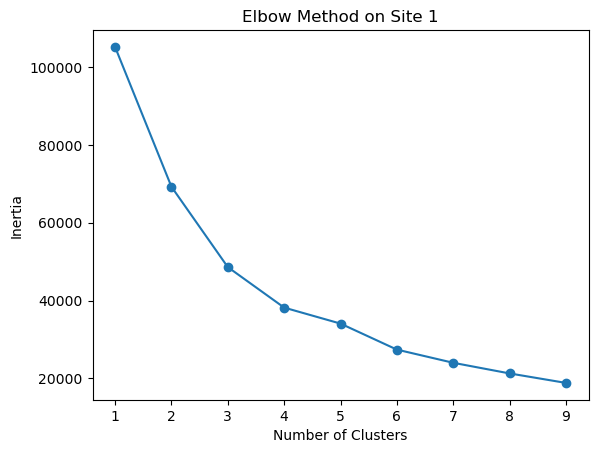

In [30]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(site1_scaled_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method on Site 1')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Determine optimal number of clusters (Hierarchical Method/ Agglomerative Clustering) for Site 1

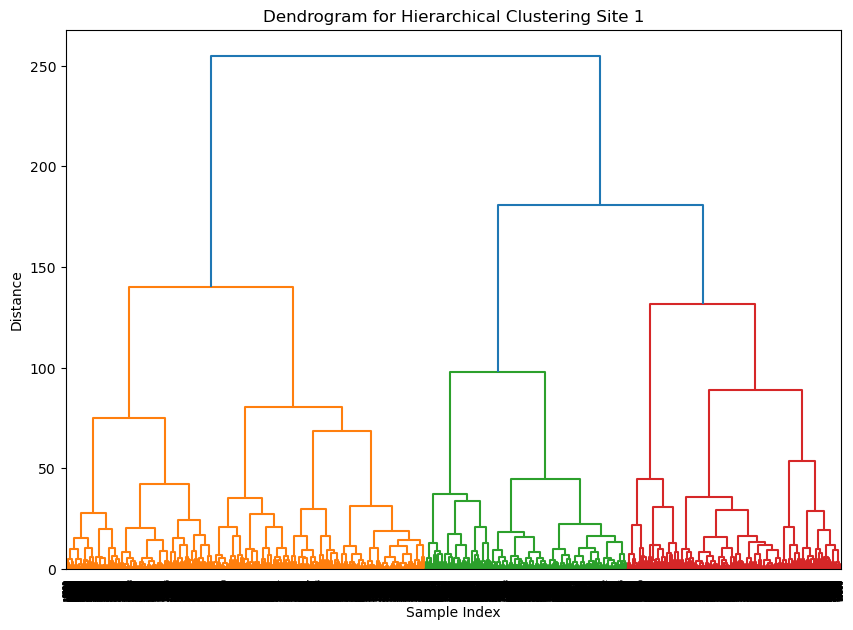

Cluster labels for each data point: [11 16 34 ... 23 18 28]


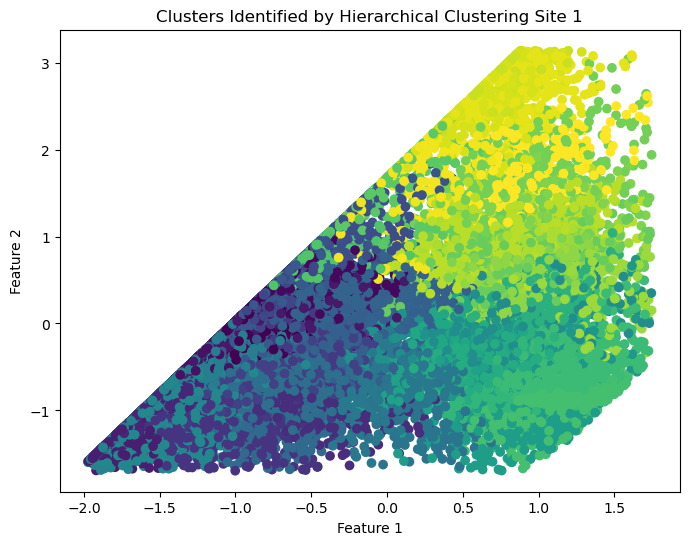

In [31]:
# Perform hierarchical/agglomerative clustering
Z = sch.linkage(site1_scaled_cleaned, method='ward')  # 'ward' minimizes the variance of the clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering Site 1")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


max_d = 15  # Adjust this value to cut the dendrogram at a certain height
clusters = fcluster(Z, max_d, criterion='distance')

# Print the clusters for each data point
print("Cluster labels for each data point:", clusters)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(site1_scaled_cleaned.iloc[:, 0], site1_scaled_cleaned.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters Identified by Hierarchical Clustering Site 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Interpretation of the plot

The elbow plot shows a pronounced bend at "number of clusters" = 3. The dendogram also displays 3 clusters, therefore the amount of clusters will be set to 3 in the next step.

## KMeans Application with optimal clusters on Site 1

In [38]:
# Apply KMeans clustering with optimal number of clusters
kmeansA = KMeans(n_clusters=3, init='random', random_state=42)
garageACopy = site1.copy()
garageACopy['cluster'] = kmeansA.fit_predict(site1_scaled_cleaned)

In [39]:
cluster_summaryA = garageACopy.groupby('cluster').mean()
print(cluster_summaryA)

         session_duration  charging_duration  idle_duration  \
cluster                                                       
0              201.337118         149.014234      52.322884   
1              560.100293         208.380195     351.720098   
2              483.295072         363.887923     119.407148   

         charging_efficiency  kWhDelivered  
cluster                                     
0                   4.045425      9.685925  
1                   2.806576      9.288049  
2                   3.951436     22.040254  


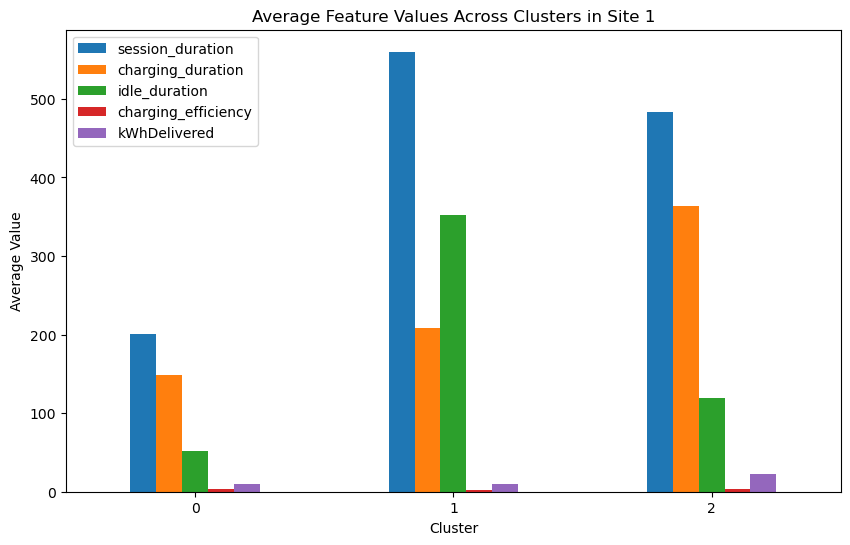

In [40]:
# Bar plot for comparing features across clusters
cluster_summaryA.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values Across Clusters in Site 1')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

## Visualization of the clusters

### Pairplot to see relations

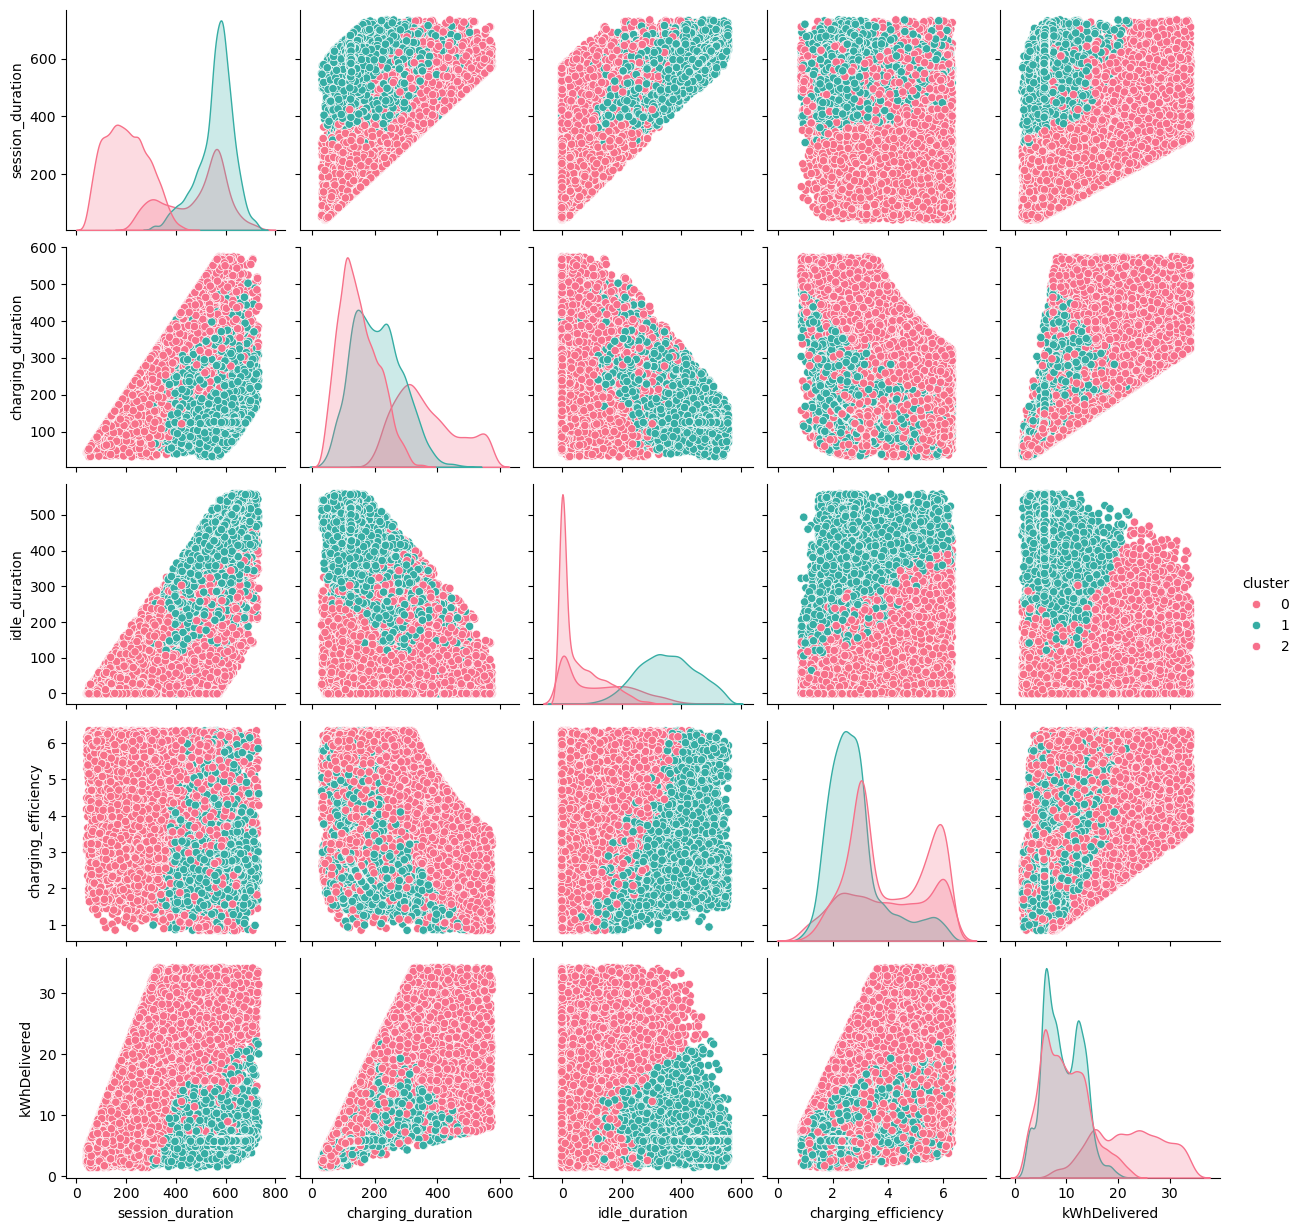

In [41]:
sns.pairplot(garageACopy, hue='cluster', palette='husl')
plt.show()

#### Scatterplots to see different feature-combinations

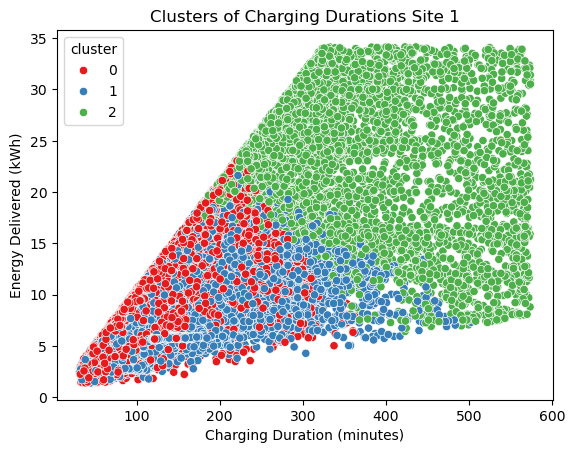

In [42]:
sns.scatterplot(data=garageACopy, x='charging_duration', y='kWhDelivered', hue='cluster', palette='Set1')
plt.title('Clusters of Charging Durations Site 1')
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Energy Delivered (kWh)')
plt.show()

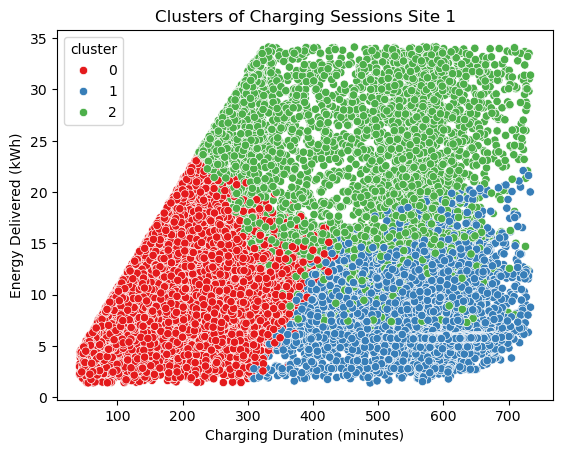

In [43]:
sns.scatterplot(data=garageACopy, x='session_duration', y='kWhDelivered', hue='cluster', palette='Set1')
plt.title('Clusters of Charging Sessions Site 1')
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Energy Delivered (kWh)')
plt.show()

#### Interpretation: 
As seen in the scatter plots above, clusters are more defined in the session duration - kwHdelivered plot. This will also be from now on the feature combination to focus on, since it is more important for the forecast. The charging duration only shows, how long the charging itself was, but the car could have been connected to the charging station for a longer period of time. 

### Box plots for session_duration and kWhDelivered

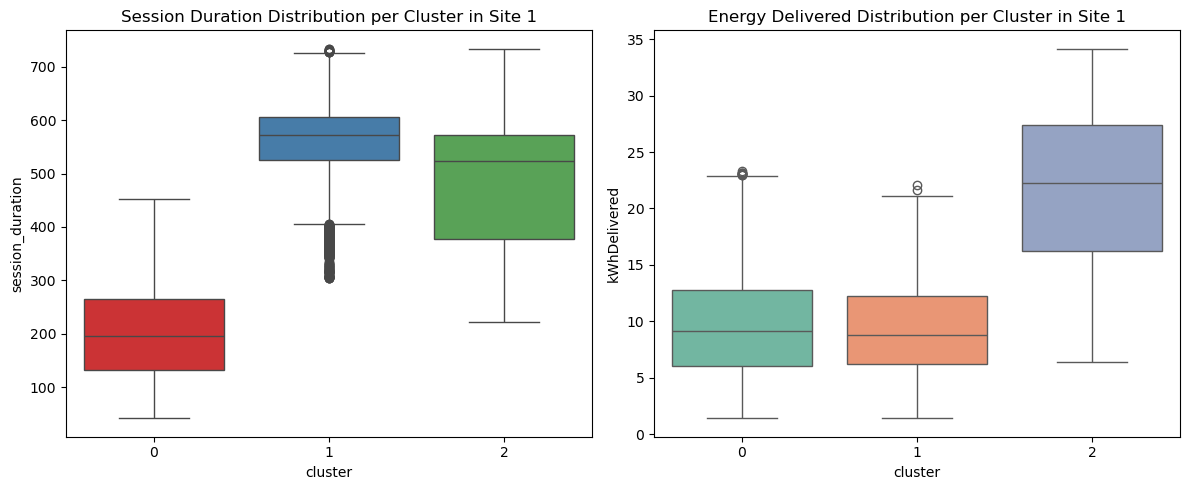

In [44]:
plt.figure(figsize=(12,5))

# Boxplot for Charging Duration 
plt.subplot(1,2,1)
sns.boxplot(x=garageACopy['cluster'], y=garageACopy['session_duration'], hue=garageACopy['cluster'], legend=False, palette="Set1")
plt.title("Session Duration Distribution per Cluster in Site 1")

# Boxplot for Energy Delivered
plt.subplot(1,2,2)
sns.boxplot(x=garageACopy['cluster'], y=garageACopy['kWhDelivered'], hue=garageACopy['cluster'], legend=False, palette="Set2")
plt.title("Energy Delivered Distribution per Cluster in Site 1")

plt.tight_layout()
plt.show()

### violin plots for session_duration and kWhDelivered

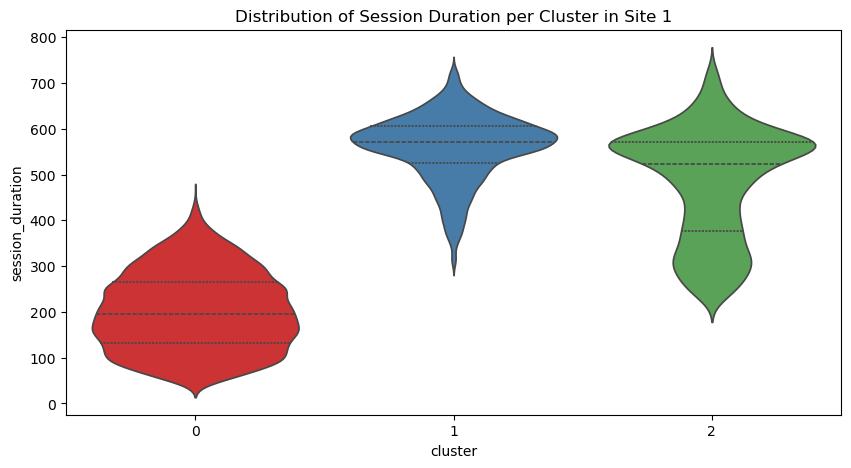

In [45]:
plt.figure(figsize=(10,5))
sns.violinplot(x=garageACopy['cluster'], y=garageACopy['session_duration'], hue=garageACopy['cluster'], legend=False, palette="Set1", inner="quartile")
plt.title("Distribution of Session Duration per Cluster in Site 1")
plt.show()

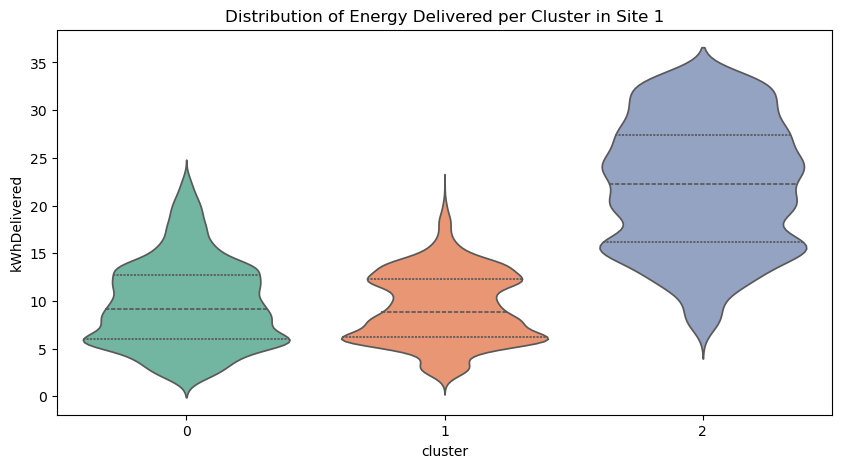

In [46]:
plt.figure(figsize=(10,5))
sns.violinplot(x=garageACopy['cluster'], y=garageACopy['kWhDelivered'], hue=garageACopy['cluster'], legend=False, palette="Set2", inner="quartile")
plt.title("Distribution of Energy Delivered per Cluster in Site 1")
plt.show()

# For site 2

In [47]:
print(site2.shape)  # Check the number of rows in site2
print(site2_scaled.shape)  # Check the number of rows in site2_scaled

(10453, 5)
(10453, 5)


In [48]:
# Remove rows with NaN or infinite values in any column
site2_scaled_cleaned = site2_scaled[~np.isinf(site2_scaled).any(axis=1) & site2_scaled.notna().all(axis=1)]

## Determine optimal number of clusters (Elbow Method) for Site 2

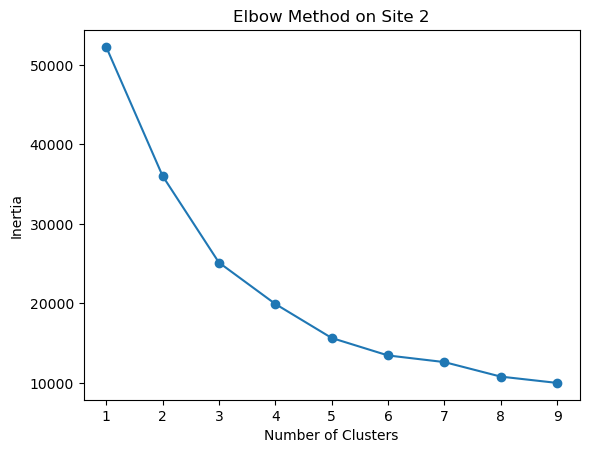

In [49]:
# Determine optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(site2_scaled_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method on Site 2')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Determine optimal number of clusters (Hierarchical Method/ Agglomerative Clustering) for Site 2

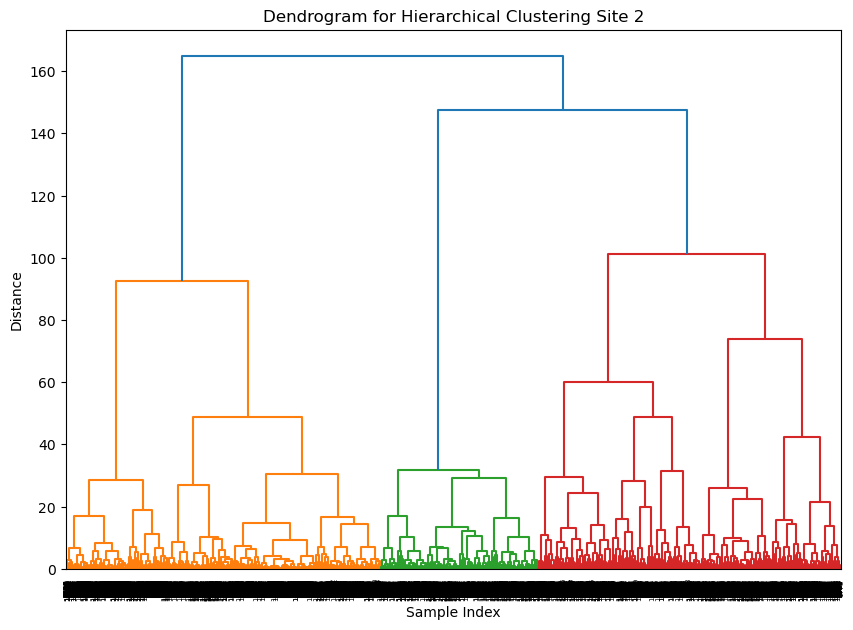

Cluster labels for each data point: [ 9  9  9 ...  7 29  7]


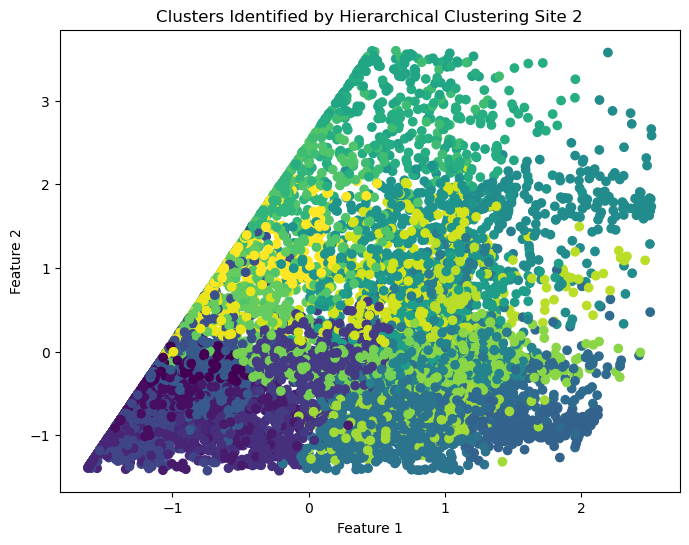

In [50]:
# Perform hierarchical/agglomerative clustering
Z = sch.linkage(site2_scaled_cleaned, method='ward')  # 'ward' minimizes the variance of the clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering Site 2")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


max_d = 15  # Adjust this value to cut the dendrogram at a certain height
clusters = fcluster(Z, max_d, criterion='distance')

# Print the clusters for each data point
print("Cluster labels for each data point:", clusters)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(site2_scaled_cleaned.iloc[:, 0], site2_scaled_cleaned.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters Identified by Hierarchical Clustering Site 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Interpretation of the plot

The plot shows a pronounced bend at "number of clusters" = 3. The dendogram displays 4 clusters, through trial and error the number of clusters is set to 3

## KMeans Application with optimal clusters on Site 2

In [51]:
# Apply KMeans with optimal clusters
kmeansB = KMeans(n_clusters=3, random_state=42)
garageBCopy = site2.copy()
garageBCopy['cluster'] = kmeansB.fit_predict(site2_scaled_cleaned)

In [52]:
cluster_summaryB = garageBCopy.groupby('cluster').mean()
print(cluster_summaryB)

         session_duration  charging_duration  idle_duration  \
cluster                                                       
0              140.375571          93.264771      47.110800   
1              415.703336         240.841614     174.861722   
2              502.035038         100.620306     401.414732   

         charging_efficiency  kWhDelivered  
cluster                                     
0                   4.096509      6.228327  
1                   4.111966     15.044645  
2                   3.457219      5.833997  


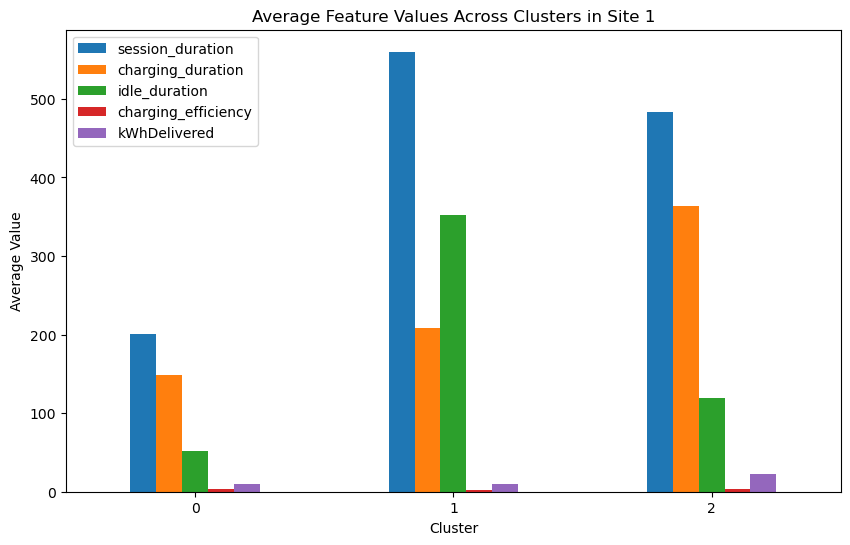

In [53]:
# Bar plot for comparing features across clusters
cluster_summaryA.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values Across Clusters in Site 1')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

## Visualization of the clusters

### Pairplot to see relations

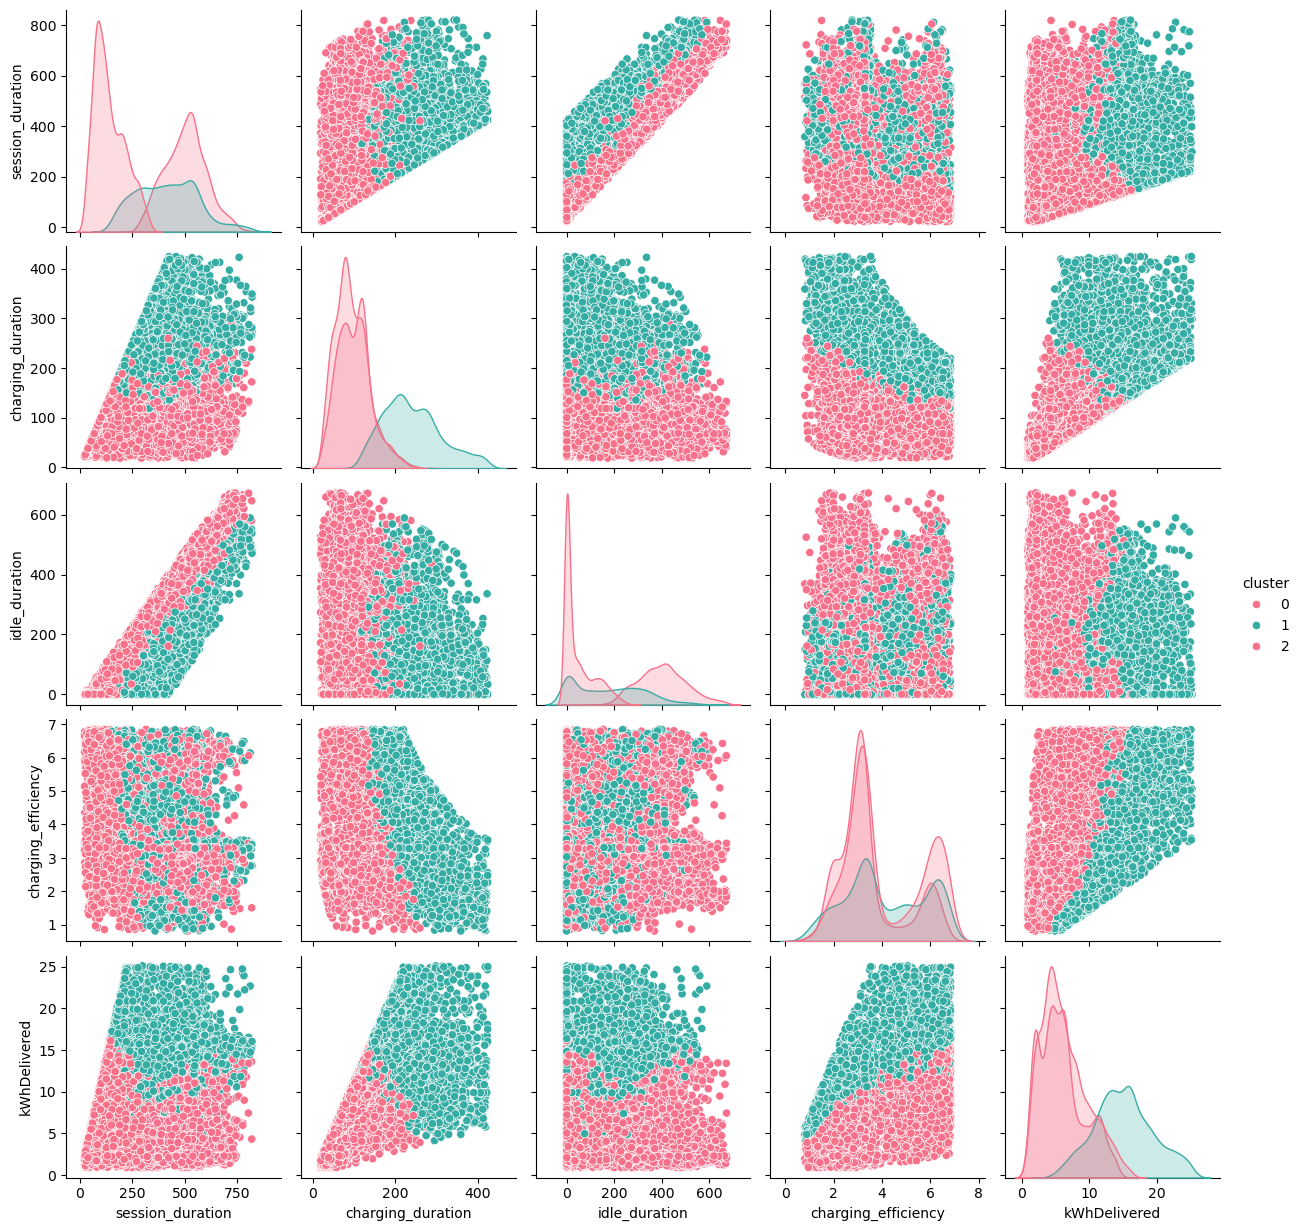

In [54]:
sns.pairplot(garageBCopy, hue='cluster', palette='husl')
plt.show()

#### Scatterplots to see different feature-combinations

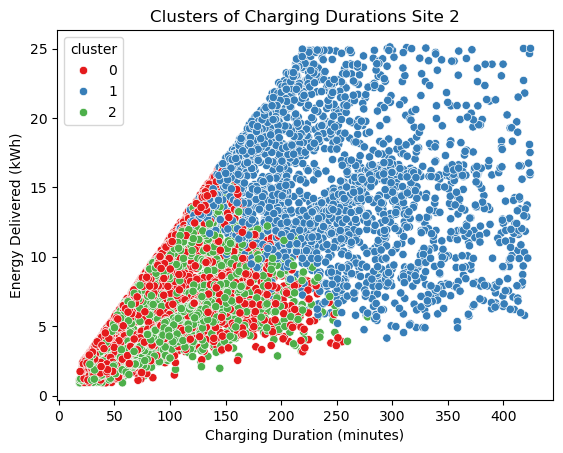

In [55]:
sns.scatterplot(data=garageBCopy, x='charging_duration', y='kWhDelivered', hue='cluster', palette='Set1')
plt.title('Clusters of Charging Durations Site 2')
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Energy Delivered (kWh)')
plt.show()

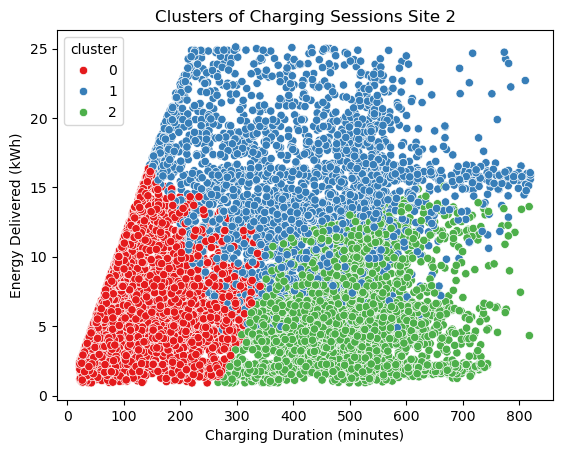

In [56]:
sns.scatterplot(data=garageBCopy, x='session_duration', y='kWhDelivered', hue='cluster', palette='Set1')
plt.title('Clusters of Charging Sessions Site 2')
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Energy Delivered (kWh)')
plt.show()

#### Interpretation: 
As seen in the scatter plots above, clusters are more defined in the session duration - kwHdelivered plot. This will also be from now on the feature combination to focus on, since it is more important for the forecast. The charging duration only shows, how long the charging itself was, but the car could have been connected to the charging station for a longer period of time. 

### Box plots for session_duration and kWhDelivered

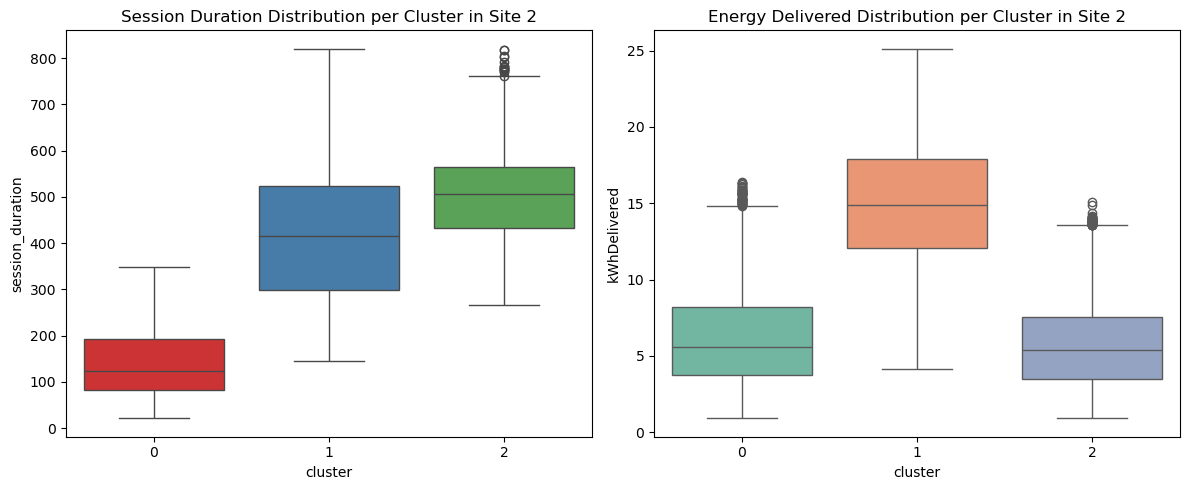

In [57]:
plt.figure(figsize=(12,5))

# Boxplot for Session Duration
plt.subplot(1,2,1)
sns.boxplot(x=garageBCopy['cluster'], y=garageBCopy['session_duration'],hue=garageBCopy['cluster'], legend=False, palette="Set1")
plt.title("Session Duration Distribution per Cluster in Site 2")

# Boxplot for Energy Delivered
plt.subplot(1,2,2)
sns.boxplot(x=garageBCopy['cluster'], y=garageBCopy['kWhDelivered'], hue=garageBCopy['cluster'], legend=False, palette="Set2")
plt.title("Energy Delivered Distribution per Cluster in Site 2")

plt.tight_layout()
plt.show()

### Violin plots for session_duration and kWhDelivered

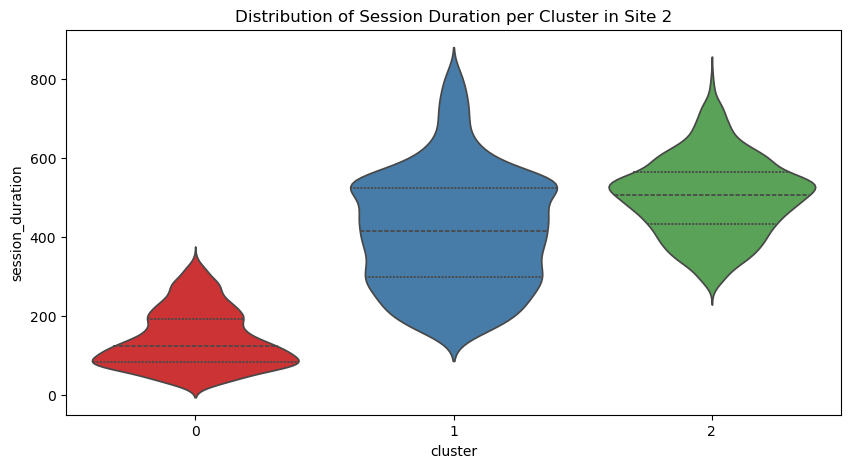

In [58]:
plt.figure(figsize=(10,5))
sns.violinplot(x=garageBCopy['cluster'], y=garageBCopy['session_duration'], hue=garageBCopy['cluster'], legend=False,palette="Set1", inner="quartile")
plt.title("Distribution of Session Duration per Cluster in Site 2")
plt.show()

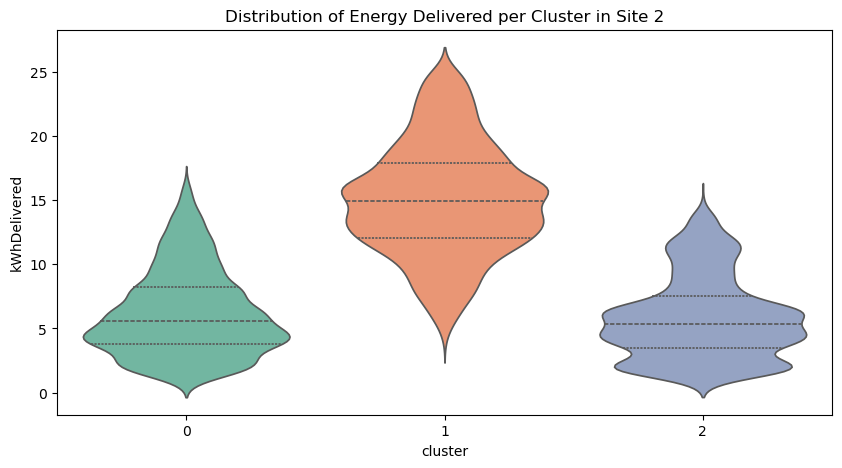

In [59]:
plt.figure(figsize=(10,5))
sns.violinplot(x=garageBCopy['cluster'], y=garageBCopy['kWhDelivered'], hue=garageBCopy['cluster'], legend=False, palette="Set2", inner="quartile")
plt.title("Distribution of Energy Delivered per Cluster in Site 2")
plt.show()